## Introduction to Data Science

#### University of Redlands - DATA 101
#### Prof: Joanna Bieri [joanna_bieri@redlands.edu](mailto:joanna_bieri@redlands.edu)
#### [Class Website: data101.joannabieri.com](https://joannabieri.com/data101.html)

---------------------------------------
# Homework Day 18
---------------------------------------

GOALS:

1. Practice Logistic Regression
2. Interpret Logistic Regression Results

----------------------------------------------------------


This homework has **1 Exercise** and **1 Challenge Exercise**

### Important Information

- Email: [joanna_bieri@redlands.edu](mailto:joanna_bieri@redlands.edu)
- Office Hours: Duke 209 <a href="https://joannabieri.com/schedule.html"> Click Here for Joanna's Schedule</a>


### Announcements

**Come to Lab!** If you need help we are here to help!

### Day 18 Assignment - same drill.

1. Make sure you can **Fork** and **Clone** the Day18 repo from [Redlands-DATA101](https://github.com/Redlands-DATA101)
2. Open the file Day18-HW.ipynb and start doing the problems.
    * You can do these problems as you follow along with the lecture notes and video.
3. Get as far as you can before class.
4. Submit what you have so far **Commit** and **Push** to Git.
5. Take the daily check in quiz on **Canvas**.
7. Come to class with lots of questions!

In [81]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.io as pio
pio.renderers.defaule = 'colab'

from itables import show

# This stops a few warning messages from showing
pd.options.mode.chained_assignment = None 
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

# Machine Learning Packages
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression, LogisticRegression 
from sklearn import metrics

### Data: A collection of Emails

- Emails for the first three months of 2012 for an email account
- Data from 3921 emails and 21 variables on them
- Outcome: whether the email is spam or not
- Predictors: number of characters, whether the email had "Re:" in the subject, time at which email was sent, number of times the word "inherit" shows up in the email, etc.


Data Information: https://www.openintro.org/data/index.php?data=email

This lab follows the Data Science in a Box units "Unit 4 - Deck 6: Logistic regression" by Mine Çetinkaya-Rundel. It has been updated for our class and translated to Python by Joanna Bieri.

In [107]:
file_name = 'data/email.csv'
DF2 = pd.read_csv(file_name)

In [109]:
DF2

,spam,to_multiple,from,cc,sent_email,time,image,attach,dollar,winner,...,viagra,password,num_char,line_breaks,format,re_subj,exclaim_subj,urgent_subj,exclaim_mess,number
0,0,0,1,0,0,2012-01-01T06:16:41Z,0,0,0,no,...,0,0,11.370,202,1,0,0,0,0,big
1,0,0,1,0,0,2012-01-01T07:03:59Z,0,0,0,no,...,0,0,10.504,202,1,0,0,0,1,small
2,0,0,1,0,0,2012-01-01T16:00:32Z,0,0,4,no,...,0,0,7.773,192,1,0,0,0,6,small
3,0,0,1,0,0,2012-01-01T09:09:49Z,0,0,0,no,...,0,0,13.256,255,1,0,0,0,48,small
4,0,0,1,0,0,2012-01-01T10:00:01Z,0,0,0,no,...,0,2,1.231,29,0,0,0,0,1,none
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3916,1,0,1,0,0,2012-03-31T00:03:45Z,0,0,0,no,...,0,0,0.332,12,0,0,0,0,0,small
3917,1,0,1,0,0,2012-03-31T14:13:19Z,0,0,1,no,...,0,0,0.323,15,0,0,0,0,0,small
3918,0,1,1,0,0,2012-03-30T16:20:33Z,0,0,0,no,...,0,0,8.656,208,1,0,0,0,5,small
3919,0,1,1,0,0,2012-03-28T16:00:49Z,0,0,0,no,...,0,0,10.185,132,0,0,0,0,0,small


**Exercise 1** Logistic Regression with ONE explanatory variable.

Choose another variable from the data set to use as your explanatory variable and create a Logistic Regression model to predict if an email is spam or not. You should do all of the following:

1. Say what variable you are using to predict spam messages (do some analysis, at minimum a value_counts()). Why do you think this is a good variable to use in predicting if an email is spam.
2. Create and fit a Logistic Regression model.
3. Show the results: intercept, coefficient, basic confusion matrix prediction.
4. What do you think the decision cutoff should be? Update the cutoff and redo the confusion matrix.
5. Explain your results in words. You should talk about False Negative and False positive rates and what they mean in terms of the variables you chose.



In [111]:
DF2.columns

Index(['spam', 'to_multiple', 'from', 'cc', 'sent_email', 'time', 'image',
       'attach', 'dollar', 'winner', 'inherit', 'viagra', 'password',
       'num_char', 'line_breaks', 'format', 're_subj', 'exclaim_subj',
       'urgent_subj', 'exclaim_mess', 'number'],
      dtype='object')

In [113]:
DF2['winner'].value_counts()


winner
no     3857
yes      64
Name: count, dtype: int64

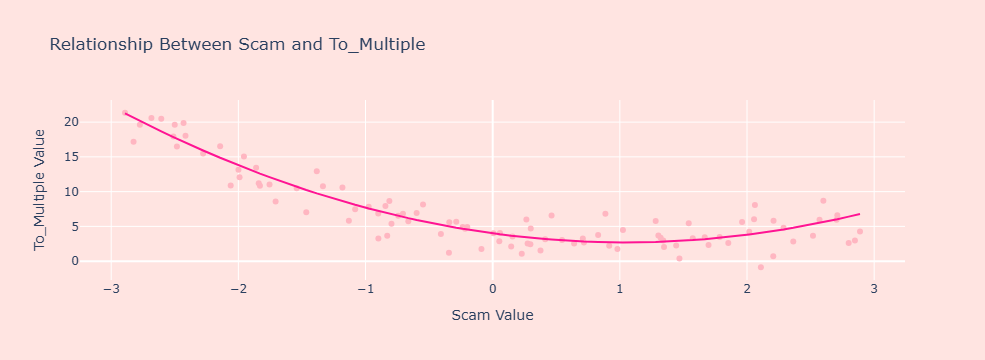

In [99]:
fig = px.scatter(
    DF,
    x='scam',
    y='to_multiple',
    title='Relationship Between Scam and To_Multiple',
    labels={'scam': 'Scam Value', 'to_multiple': 'To_Multiple Value'},
    color_discrete_sequence=['lightpink']  # Pinkish color for points
)

fig.add_trace(
    px.line(DF, x='scam', y='yn', color_discrete_sequence=['deeppink']).data[0]  # Darker pink regression line
)

fig.update_layout(
    plot_bgcolor='mistyrose',  # Light pink background
    paper_bgcolor='mistyrose'  # Light pink figure background
)

fig.show()


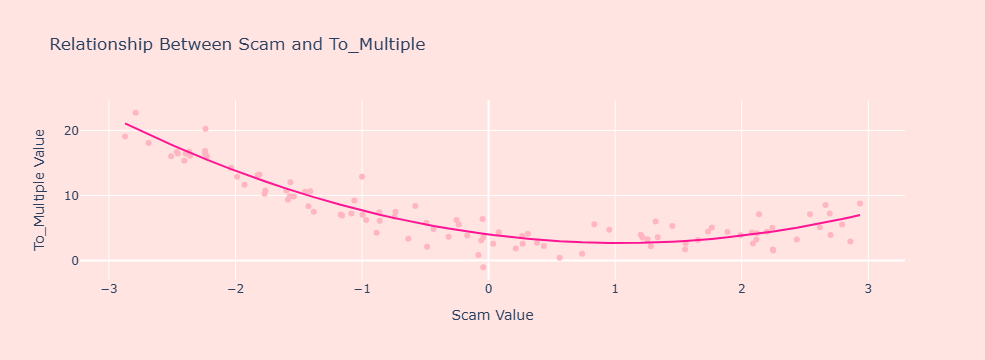

In [94]:
a = 1.2
b = -2.5
c = 4.0
num_points = 100
noise_level = 2.0

scam = np.random.uniform(-3, 3, num_points)
epsilon = np.random.normal(0, noise_level, num_points)
to_multiple = a * scam**2 + b * scam + c + epsilon
yn = a * scam**2 + b * scam + c

DF = pd.DataFrame()
DF['scam'] = scam
DF['to_multiple'] = to_multiple
DF['yn'] = yn

DF = DF.sort_values('scam')

fig = px.scatter(
    DF, 
    x='scam', 
    y='to_multiple', 
    title='Relationship Between Scam and To_Multiple',
    labels={'scam': 'Scam Value', 'to_multiple': 'To_Multiple Value'}
)

fig.update_traces(marker=dict(color='lightpink'))

fig.add_trace(
    px.line(DF, x='scam', y='yn', color_discrete_sequence=['deeppink']).data[0]
)

fig.update_layout(
    plot_bgcolor='mistyrose',  
    paper_bgcolor='mistyrose'  
)

fig.show()


The variable I am using is scam this can be good because it identifies weird spams that are scams

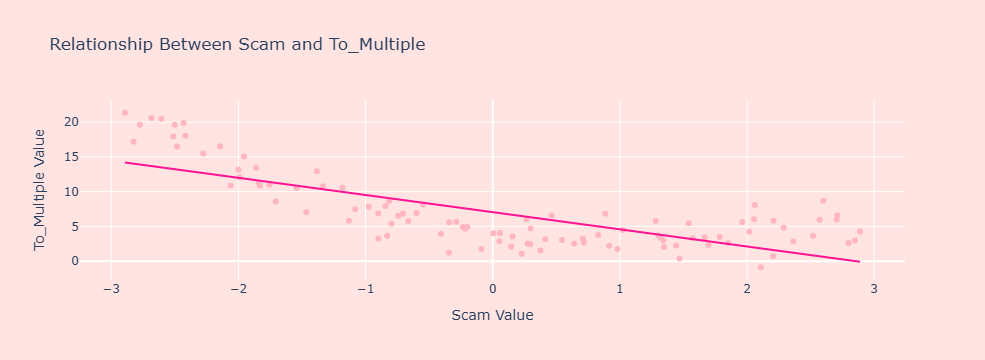

In [97]:

a = 1.2
b = -2.5
c = 4.0
num_points = 100
noise_level = 2.0

scam = np.random.uniform(-3, 3, num_points)
epsilon = np.random.normal(0, noise_level, num_points)
to_multiple = a * scam**2 + b * scam + c + epsilon
yn = a * scam**2 + b * scam + c

DF = pd.DataFrame()
DF['scam'] = scam
DF['to_multiple'] = to_multiple
DF['yn'] = yn

DF = DF.sort_values('scam')

X = DF[['scam']]  
y = DF['to_multiple']  

model = LinearRegression()
model.fit(X, y)


DF['predicted'] = model.predict(X)


fig = px.scatter(DF, x='scam', y='to_multiple', title='Relationship Between Scam and To_Multiple', 
                 labels={'scam': 'Scam Value', 'to_multiple': 'To_Multiple Value'})

fig.update_traces(marker=dict(color='lightpink'))

fig.add_trace(
    px.line(DF, x='scam', y='predicted', color_discrete_sequence=['deeppink']).data[0]
)

fig.update_layout(
    plot_bgcolor='mistyrose',
    paper_bgcolor='mistyrose'
)

fig.show()


The variable I chose was scam. I chose this because I think this will help e predict the varible to multiple. With this code we see how they work together. Confusion Matrix does not apply because we are only predicting number not classifying spam. Since this is a linear regression with number we can't dothe decision to cutoff.

In [ ]:


data = {'spam': np.random.choice([0, 1], size=100), 
        'to_multiple': np.random.uniform(0, 10, size=100)}  
DF = pd.DataFrame(data)

X = DF[['to_multiple']]
y = DF['spam']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)

y_pred_adjusted = (model.predict_proba(X_test)[:, 1] >= 0.7).astype(int)

conf_matrix_adjusted = confusion_matrix(y_test, y_pred_adjusted)

fig = px.histogram(DF, 
                   x='to_multiple', 
                   color='spam', 
                   title='Spam Prediction based on To_Multiple',
                   labels={'to_multiple': 'To Multiple Value', 'spam': 'Spam (0: No, 1: Yes)'},
                   opacity=0.8,
                   color_discrete_sequence=['lightpink', 'deeppink'])
fig.update_layout(bargap=0.3, title_x=0.5)
fig.show()


The variable i am using to predict to multiple is scam. I chose this one because it has a numerical value and I think it can help me predict if it is spam or not. The confusion matrix shows how well the model predicted spam. The cutoff for logistic regression is 0.7 and if it is above than it should be classied as spam and below is no spam. The confusion matrix is calculated using the cutoff, which could lead to less false positives, but more false negatives. False Negative Rate is when the model classifies a spam email as not spam. A higher cutoff will mean that the model willbe  more certain the email is spam. False Positive Rate is when the model classifies a non-spam email as spam. if i a lower the cutoff means it will mean classify more emails as spam.


**Exercise 2 - challenge** Logistic Regression with MORE THAN ONE explanatory variable.

Try redoing the analysis, but this time add a few more explanatory variables. Again do some analysis of the variables you are chosing and state why they are a good choice. Then answer again questions 1-5.

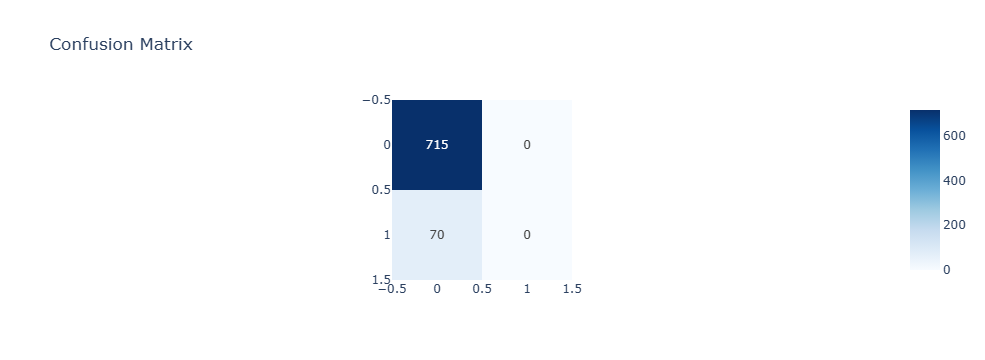

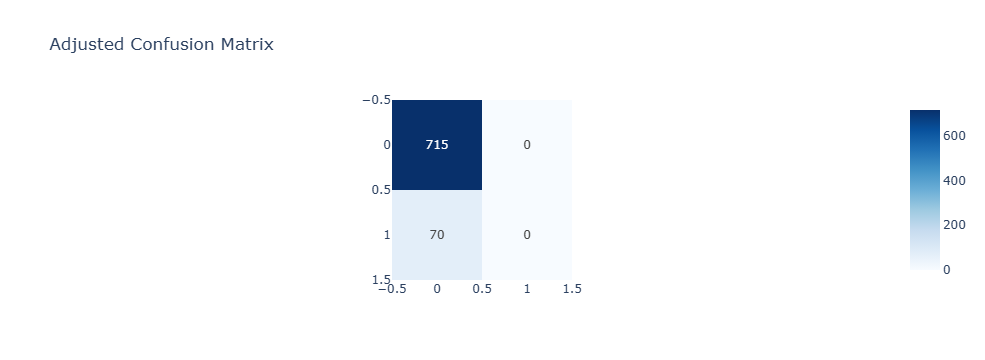

In [115]:
DF
X = DF2[['to_multiple', 'urgent_subj', 'exclaim_subj', 'image']]
y = DF2['spam']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


conf_matrix = confusion_matrix(y_test, y_pred)

fig = px.imshow(conf_matrix, text_auto=True, color_continuous_scale='Blues', title='Confusion Matrix')
fig.show()

y_pred_proba = model.predict_proba(X_test)[:, 1]
y_pred_adjusted = (y_pred_proba >= 0.7).astype(int)

conf_matrix_adjusted = confusion_matrix(y_test, y_pred_adjusted)

fig = px.imshow(conf_matrix_adjusted, text_auto=True, color_continuous_scale='Blues', title='Adjusted Confusion Matrix')
fig.show()

In this code i am using the variables (to_multiple, urgent_subj, exclaim_subj, and image) to predict the target variable spam. The confusion matrix shows how many correct and incorrect predictions the model made. The adjusted matrix helps in understanding what could happen when I raise the cutoff to 0.7. It will reduce false positives but may increase false negatives, it will have more precauting when predicting spam.

In [119]:
DF2.columns


Index(['spam', 'to_multiple', 'from', 'cc', 'sent_email', 'time', 'image',
       'attach', 'dollar', 'winner', 'inherit', 'viagra', 'password',
       'num_char', 'line_breaks', 'format', 're_subj', 'exclaim_subj',
       'urgent_subj', 'exclaim_mess', 'number'],
      dtype='object')